# HW2 Problem 2: German Credit Dataset

## <span style="color: #0063d4;">Setup</span>

In [1]:
# Import pandas
import pandas as pd

# Read the CSV file
df = pd.read_csv("GermanCredit.csv")
df.head()
df.info()
df.describe()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   checking_status         1000 non-null   object
 1   duration                1000 non-null   int64 
 2   credit_history          1000 non-null   object
 3   purpose                 1000 non-null   object
 4   credit_amount           1000 non-null   int64 
 5   savings_status          1000 non-null   object
 6   employment              1000 non-null   object
 7   installment_commitment  1000 non-null   int64 
 8   personal_status         1000 non-null   object
 9   other_parties           1000 non-null   object
 10  residence_since         1000 non-null   int64 
 11  property_magnitude      1000 non-null   object
 12  age                     1000 non-null   int64 
 13  other_payment_plans     1000 non-null   object
 14  housing                 1000 non-null   object
 15  exist

(1000, 21)

 ## <span style="color: #0063d4;">Preprocessing </span>

#### Drop the 3 columns that contribute the least to the dataset. These would be the columns with the highest number of non-zero 'none' values. Break ties by going left to right in columns. (Your code should be generalizable to drop n columns, but for the rest of the analysis, you can call your code for n=3.)


In [2]:
(df == 'none').sum()

checking_status             0
duration                    0
credit_history              0
purpose                     0
credit_amount               0
savings_status              0
employment                  0
installment_commitment      0
personal_status             0
other_parties             907
residence_since             0
property_magnitude          0
age                         0
other_payment_plans       814
housing                     0
existing_credits            0
job                         0
num_dependents              0
own_telephone             596
foreign_worker              0
class                       0
dtype: int64

In [3]:
def drop_most_none_columns(df, n=3):
    # Count 'none' values per column
    none_counts = (df == 'none').sum()
    
    # Create a helper DataFrame that includes each column's original order
    order = pd.Series(range(len(df.columns)), index=df.columns)
    helper = pd.DataFrame({
        'none_count': none_counts,
        'order': order
    })
    
    # Sort by none_count (descending) and order (ascending)
    helper_sorted = helper.sort_values(by=['none_count', 'order'], ascending=[False, True])
    
    # Select the first n columns
    cols_to_drop = helper_sorted.head(n).index
    
    print(f"Dropping columns in left-to-right order: {list(cols_to_drop)}")
    
    return df.drop(columns=cols_to_drop)

# Drop the top 3 columns (based on none count, left-to-right order)
df = drop_most_none_columns(df, n=3)

# Confirm
df.shape


Dropping columns in left-to-right order: ['other_parties', 'other_payment_plans', 'own_telephone']


(1000, 18)

#### Certain values in some of the columns contain unnecessary apostrophes (‘). Remove the apostrophes.

In [4]:
df.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,residence_since,property_magnitude,age,housing,existing_credits,job,num_dependents,foreign_worker,class
0,'<0',6,'critical/other existing credit',radio/tv,1169,'no known savings','>=7',4,'male single',4,'real estate',67,own,2,skilled,1,yes,good
1,'0<=X<200',48,'existing paid',radio/tv,5951,'<100','1<=X<4',2,'female div/dep/mar',2,'real estate',22,own,1,skilled,1,yes,bad
2,'no checking',12,'critical/other existing credit',education,2096,'<100','4<=X<7',2,'male single',3,'real estate',49,own,1,'unskilled resident',2,yes,good
3,'<0',42,'existing paid',furniture/equipment,7882,'<100','4<=X<7',2,'male single',4,'life insurance',45,'for free',1,skilled,2,yes,good
4,'<0',24,'delayed previously','new car',4870,'<100','1<=X<4',3,'male single',4,'no known property',53,'for free',2,skilled,2,yes,bad


In [5]:
# Loop through only string/object columns
for col in df.select_dtypes(include='object'):
    df[col] = df[col].map(
        lambda x: x.replace("'", "")
                    .replace("‘", "")
                    .replace("’", "") if isinstance(x, str) else x
    )


In [6]:
df.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,residence_since,property_magnitude,age,housing,existing_credits,job,num_dependents,foreign_worker,class
0,<0,6,critical/other existing credit,radio/tv,1169,no known savings,>=7,4,male single,4,real estate,67,own,2,skilled,1,yes,good
1,0<=X<200,48,existing paid,radio/tv,5951,<100,1<=X<4,2,female div/dep/mar,2,real estate,22,own,1,skilled,1,yes,bad
2,no checking,12,critical/other existing credit,education,2096,<100,4<=X<7,2,male single,3,real estate,49,own,1,unskilled resident,2,yes,good
3,<0,42,existing paid,furniture/equipment,7882,<100,4<=X<7,2,male single,4,life insurance,45,for free,1,skilled,2,yes,good
4,<0,24,delayed previously,new car,4870,<100,1<=X<4,3,male single,4,no known property,53,for free,2,skilled,2,yes,bad


#### The checking_status column has values in 4 categories: 'no checking', '<0', '0<=X<200', and '>=200'. Change these to 'No Checking', 'Low', 'Medium', and 'High' respectively.

In [7]:
# Map old values to new ones
df['checking_status'] = df['checking_status'].replace({
    'no checking': 'No Checking',
    '<0': 'Low',
    '0<=X<200': 'Medium',
    '>=200': 'High'
})
df['checking_status'].value_counts()


checking_status
No Checking    394
Low            274
Medium         269
High            63
Name: count, dtype: int64

#### The savings_status column has values in 4 categories: 'no known savings', '<100', '100<=X<500', '500<=X<1000', and '>=1000'. Change these to 'No Savings', 'Low', 'Medium', 'High', and 'High' respectively. (Yes, the last two are both 'High').

In [8]:
# Map old savings_status values to the new categories
df['savings_status'] = df['savings_status'].replace({
    'no known savings': 'No Savings',
    '<100': 'Low',
    '100<=X<500': 'Medium',
    '500<=X<1000': 'High',
    '>=1000': 'High'
})
df['savings_status'].value_counts()


savings_status
Low           603
No Savings    183
High          111
Medium        103
Name: count, dtype: int64

#### Change class column values from 'good' to '1' and 'bad' to '0'.

In [9]:
df['class'] = df['class'].replace({'good': 1, 'bad': 0}).astype(int)
df['class'].value_counts()

/tmp/ipykernel_904300/3355451117.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['class'] = df['class'].replace({'good': 1, 'bad': 0}).astype(int)


class
1    700
0    300
Name: count, dtype: int64

#### Change the employment column value 'unemployed' to 'Unemployed', and for the others, change to 'Amateur', 'Professional', 'Experienced' and 'Expert', depending on year range.


In [10]:
df['employment'] = df['employment'].replace({
    'unemployed': 'Unemployed',
    '<1': 'Amateur',
    '1<=X<4': 'Professional',
    '4<=X<7': 'Experienced',
    '>=7': 'Expert'
})
df['employment'].value_counts()

employment
Professional    339
Expert          253
Experienced     174
Amateur         172
Unemployed       62
Name: count, dtype: int64

 ## <span style="color: #0063d4;">Analysis</span>

#### Often we need to find correlations between categorical attributes, i.e. attributes that have values that fall in one of several categories, such as "yes"/"no" for attr1, or "low","medium","high" for attr2. One such correlation is to find counts in combinations of categorial values across attributes, as in how many instances are "yes" for attr1 and "low" for attr2. A good way to find such counts is to use the Pandas crosstab function. Do this for the following two counts.

#### Get the count of each category of foreign workers (yes and no) for each class of credit (good and bad).

In [11]:
pd.crosstab(df['foreign_worker'], df['class'])

class,0,1
foreign_worker,,
no,4,33
yes,296,667


#### Similarly, get the count of each category of employment for each category of saving_status.

In [12]:
pd.crosstab(df['employment'], df['savings_status'])

savings_status,High,Low,Medium,No Savings
employment,,,,
Amateur,12,120,17,23
Experienced,18,100,24,32
Expert,34,133,22,64
Professional,44,210,33,52
Unemployed,3,40,7,12


#### Find the average credit_amount of single males that have 4<=X<7 years of employment. You can leave the raw result as is, no need for rounding.

In [13]:
avg_amount = df[
    (df['personal_status'] == 'male single') &
    (df['employment'] == 'Experienced')
]['credit_amount'].mean()

avg_amount


4142.592592592592

#### Find the average credit duration for each of the job types. You can leave the raw result as is, no need for rounding.

In [14]:
avg_duration_by_job = df.groupby('job')['duration'].mean()
avg_duration_by_job

job
high qualif/self emp/mgmt    25.168919
skilled                      21.411111
unemp/unskilled non res      17.363636
unskilled resident           16.535000
Name: duration, dtype: float64

#### For the purpose 'education', what is the most common checking_status and savings_status? 

In [15]:
# Filter rows where purpose == 'education'
edu_df = df[df['purpose'] == 'education']

# Find the most common checking_status
most_common_checking = edu_df['checking_status'].mode()[0]

# Find the most common savings_status
most_common_savings = edu_df['savings_status'].mode()[0]

# Print results
print("Most common checking status:", most_common_checking)
print("Most common savings status:", most_common_savings)


Most common checking status: No Checking
Most common savings status: Low


 ## <span style="color: #0063d4;">Visualization </span>

#### Plot subplots of two bar charts: one for savings_status (x-axis) to personal status (y-axis), and another for checking_status (x-axis) to personal_status (y-axis). In each of the charts, each personal status category bar (number of people in that category) should be of a different color.

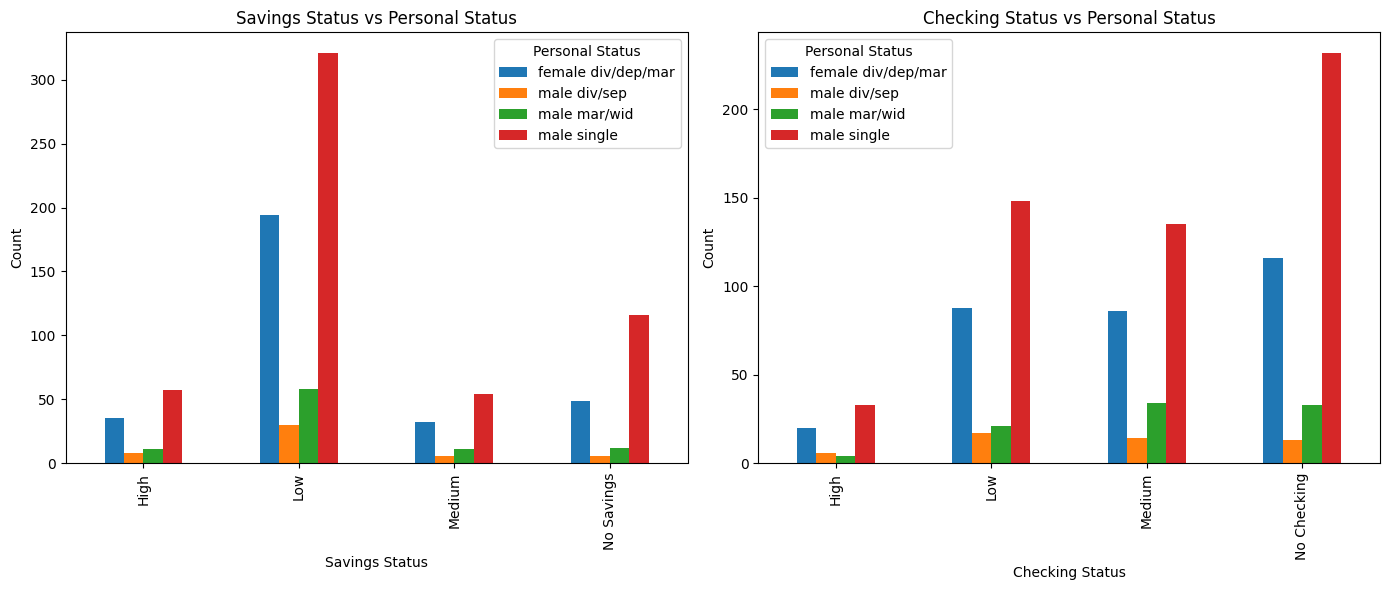

In [16]:
import matplotlib.pyplot as plt
# First crosstabs
savings_ct = pd.crosstab(df['savings_status'], df['personal_status'])
checking_ct = pd.crosstab(df['checking_status'], df['personal_status'])

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# --- Plot 1: Savings_status vs Personal_status ---
savings_ct.plot(kind='bar', ax=axes[0])
axes[0].set_title("Savings Status vs Personal Status")
axes[0].set_xlabel("Savings Status")
axes[0].set_ylabel("Count")
axes[0].legend(title="Personal Status")

# --- Plot 2: Checking_status vs Personal_status ---
checking_ct.plot(kind='bar', ax=axes[1])
axes[1].set_title("Checking Status vs Personal Status")
axes[1].set_xlabel("Checking Status")
axes[1].set_ylabel("Count")
axes[1].legend(title="Personal Status")

plt.tight_layout()
plt.show()


#### For people having credit_amount more than 4000, plot a bar graph which maps property_magnitude (x-axis) to the average customer age for that magnitude (y-axis).

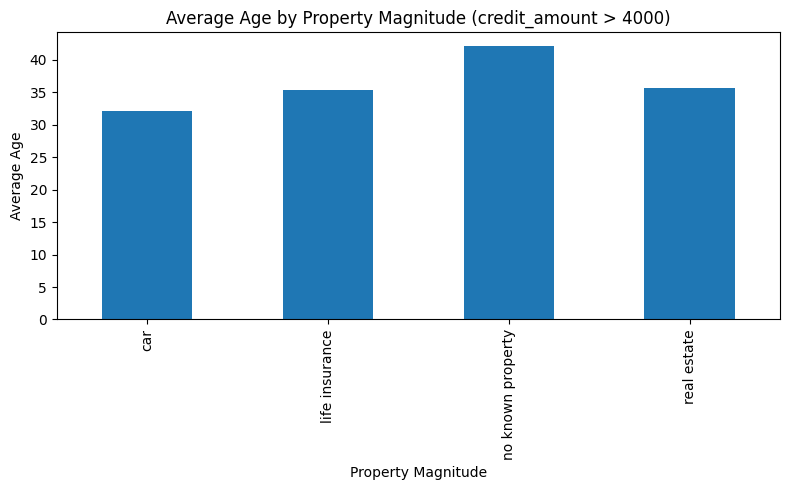

In [17]:
# Filter rows where credit_amount > 4000
high_credit = df[df['credit_amount'] > 4000]

# Group by property_magnitude and compute average age
avg_age = high_credit.groupby('property_magnitude')['age'].mean()

# Plot
plt.figure(figsize=(8, 5))
avg_age.plot(kind='bar')
plt.title("Average Age by Property Magnitude (credit_amount > 4000)")
plt.xlabel("Property Magnitude")
plt.ylabel("Average Age")
plt.tight_layout()
plt.show()


#### For people with a "High" savings_status and age above 40, use subplots to plot the following pie charts:

In [ ]:
import matplotlib.pyplot as plt

# Filter the required group
filtered = df[(df['savings_status'] == 'High') & (df['age'] > 40)]

# Value counts for each attribute
ps_counts = filtered['personal_status'].value_counts()
ch_counts = filtered['credit_history'].value_counts()
job_counts = filtered['job'].value_counts()

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Pie chart 1: Personal status
axes[0].pie(ps_counts, labels=ps_counts.index, autopct='%1.1f%%')
axes[0].set_title("Personal Status (High savings & age > 40)")

# Pie chart 2: Credit history
axes[1].pie(ch_counts, labels=ch_counts.index, autopct='%1.1f%%')
axes[1].set_title("Credit History (High savings & age > 40)")

# Pie chart 3: Job
axes[2].pie(job_counts, labels=job_counts.index, autopct='%1.1f%%')
axes[2].set_title("Job (High savings & age > 40)")

plt.tight_layout()
plt.show()
